# Recensement

Dataviz sur les données du recensement 2019 avec recoupement sur les logements

In [31]:
!pip install pandas seaborn dataprep

     |████████████████████████████████| 9.5 MB 5.0 MB/s eta 0:00:01     |████▎                           | 1.2 MB 1.5 MB/s eta 0:00:06
     |████████████████████████████████| 764 kB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 943 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 3.1 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.8 MB 197 kB/s eta 0:00:01    |██▋                             | 1.4 MB 9.9 MB/s eta 0:00:02
     |████████████████████████████████| 49 kB 1.3 MB/s eta 0

In [4]:
!wget "https://data.gouv.nc/explore/dataset/rp-2019-indv-psud/download/?format=csv&timezone=Pacific/Noumea&lang=fr&use_labels_for_header=true&csv_separator=%2C" -O data/recensement_individus.csv

--2022-05-11 02:42:32--  https://data.gouv.nc/explore/dataset/rp-2019-indv-psud/download/?format=csv&timezone=Pacific/Noumea&lang=fr&use_labels_for_header=true&csv_separator=%2C
Resolving proxy-web.proxy-dmz.gnc (proxy-web.proxy-dmz.gnc)... 172.20.100.40
Connecting to proxy-web.proxy-dmz.gnc (proxy-web.proxy-dmz.gnc)|172.20.100.40|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘data/recensement_individus.csv’

data/recensement_in     [               <=>  ]  17.14M   135KB/s    in 2m 8s   

2022-05-11 02:44:42 (137 KB/s) - ‘data/recensement_individus.csv’ saved [17971968]



In [18]:
!wget "https://data.gouv.nc/explore/dataset/rp-2019-logements/download/?format=csv&timezone=Pacific/Noumea&lang=fr&use_labels_for_header=true&csv_separator=%2C" -O data/recensement_logements.csv

--2022-05-11 02:55:23--  https://data.gouv.nc/explore/dataset/rp-2019-logements/download/?format=csv&timezone=Pacific/Noumea&lang=fr&use_labels_for_header=true&csv_separator=%2C
Resolving proxy-web.proxy-dmz.gnc (proxy-web.proxy-dmz.gnc)... 172.20.100.40
Connecting to proxy-web.proxy-dmz.gnc (proxy-web.proxy-dmz.gnc)|172.20.100.40|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘data/recensement_logements.csv’

data/recensement_lo     [        <=>         ]  10.77M   302KB/s    in 42s     

2022-05-11 02:56:05 (263 KB/s) - ‘data/recensement_logements.csv’ saved [11293731]



In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
df = pd.read_csv("data/recensement_individus.csv")
df['COUPLE'] = df['COUPLE'].astype("category")
df['COUPLE'] = df['COUPLE'].cat.rename_categories({1: 'Vit en couple', 2: 'ne vit pas en couple'})

df['CS24'] = df['CS24'].astype("category")
df['CS24'] = df['CS24'].cat.rename_categories({10: 'Agriculteurs exploitants', 21: 'Artisans', 22: 'Commerçants et assimilés', 23: 'Chefs d\'entreprise de 10 salariés ou plus',
                                               31: 'Professions libérales et assimilés', 32: 'Cadres de la fonction publique, professions intellectuelles et artistiques',
                                               36: 'Cadres d\'entreprise', 41: 'Professions intermédiaires de l\'enseignement, de la santé, de la fonction publique et assimilés',
                                               46: 'Professions intermédiaires administratives et commerciales des entreprises', 47: 'Techniciens',
                                               48: 'Contremaîtres, agents de maîtrise', 51: 'Employés de la fonction publique',
                                               54: 'Employés administratifs d\'entreprise', 55: 'Employés de commerce', 56: 'Personnels des services directs aux particuliers',
                                               61: 'Ouvriers qualifiés', 66: 'Ouvriers non qualifiés', 69: 'Ouvriers agricoles'})

df['CS42'] = df['CS42'].astype("category")
df['CS42'] = df['CS42'].cat.rename_categories({11: 'Agriculteurs sur petites exploitations', 12: 'Agriculteurs sur moyennes exploitations', 13: 'Agriculteurs sur grandes exploitations',
                                               21: 'Artisans', 22: 'Commerçants et assimilés' ,23: 'Chefs d\'entreprise de 10 salariés ou plus',
                                               31: 'Professions libérales et assimilés', 33: 'Cadres de la fonction publique', 34: 'Professeurs, professions scientifiques',
                                               35: 'Professions de l\'information, des arts et des spectacles', 37: 'Cadres administratifs et commerciaux d\'entreprise',
                                               38: 'Ingénieurs et cadres techniques d\'entreprise', 42: 'Professeurs des écoles, instituteurs et assimilés',
                                               43: 'Professions intermédiaires de la santé et du travail social',
                                               44: 'Clergé, religieux', 45: 'Professions intermédiaires administratives de la fonction publique',
                                               46: 'Professions intermédiaires administratives et commerciales des entreprises', 47: 'Techniciens',
                                               48: 'Contremaîtres, agents de maîtrise', 52: 'Employés civils et agents de service de la fonction publique',
                                               53: 'Policiers et militaires', 54: 'Employés administratifs d\'entreprise', 55: 'Employés de commerce',
                                               56: 'Personnels des services directs aux particuliers', 62: 'Ouvriers qualifiés de type industriel',
                                               63: 'Ouvriers qualifiés de type artisanal', 64: 'Chauffeurs', 65: 'Ouvriers qualifiés de la manutention, du magasinage et du transport',
                                               67: 'Ouvriers non qualifiés de type industriel', 68: 'Ouvriers non qualifiés de type artisanal',
                                               69: 'Ouvriers agricoles'})


df['CS8'] = df['CS8'].astype("category")
df['CS8'] = df['CS8'].cat.rename_categories({1: 'Agriculteurs exploitants', 2: 'Artisans, commerçants et chefs d\'entreprise',
                                             3: 'Cadres et professions intellectuelles supérieures', 4 : 'Professions Intermédiaires',
                                             5: 'Employés', 6: 'Ouvriers'})


df['CSSAL'] = df['CSSAL'].astype("category")
df['CSSAL'] = df['CSSAL'].cat.rename_categories({1: 'Manœuvre, ouvrier spécialisé', 2: 'Ouvrier qualifié ou hautement qualifié, technicien d’atelier',
                                                 3: 'Technicien (non cadre)', 4 : 'Agent de catégorie B de la fonction publique',
                                                 5: 'Agent de maîtrise, maîtrise administrative ou commerciale, VRP', 6: 'Agent de catégorie A de la fonction publique',
                                                 7: 'Ingénieur, cadre d’entreprise', 8: 'Agent de catégorie C ou D de la fonction publique',
                                                 9: 'Employé (par exemple : de bureau, de commerce, de la restauration, de maison)'})

EMPL_labels = {3: 'Artisan, commerçant, industriel, travailleur indépendant', 4: 'Stagiaire rémunéré, apprenti sous contrat',
                5: 'Salarié du secteur privé à durée déterminée', 6: 'Salarié du secteur privé à durée indéterminée',
                7 : 'Salarié du secteur public à durée déterminée', 8: 'Salarié du secteur public à durée indéterminé', }
df['EMPL'] = df['EMPL'].astype("category")


df['DIPL'] = df['DIPL'].astype("category")
diplomes_libelles = {1: 'Pas de scolarisation', 2: 'Aucun diplôme mais scolarisation jusqu’en primaire', 3: 'Aucun diplôme mais scolarisation jusqu’au collège', 
            4: 'Aucun diplôme mais scolarisation au-delà du collège', 11: 'CEP' , 12: 'BEPC, brevet élémentaire, brevet des collèges, DNB' , 13: 'CAP, BEP ou diplôme de niveau équivalent',
            14: 'Bac général ou technologique, brevet supérieur, capacité en droit, DAEU, ESEU',
            15: 'Bac professionnel, brevet professionnel de technicien ou d’enseignement, diplôme équivalent',
            16: 'BTS, DUT, Deug, Deust, diplôme de santé ou du social niveau bac + 2, diplôme équivalent',
            17: 'Licence, Licence pro, maîtrise, diplôme équivalent de niveau bac + 3 ou bac + 4',
            18: 'Master, DEA, diplôme grande école niveau bac + 5, doctorat de santé',
            19: 'Doctorat de recherche (hors santé)'}
#df['DIPL'] = df['DIPL'].cat.rename_categories(diplomes_libelles)




#df['CS8'] = df['CS8'].astype("category")
#df['CS8'] = df['CS8'].cat.rename_categories({ : '',: '', : '',: '', : '', })

#df['CS8'] = df['CS8'].astype("category")
#df['CS8'] = df['CS8'].cat.rename_categories({ : '',: '', : '',: '', : '', })


df.head()

ID    IDLOG  AGEA  AGER  ANNINS    APE  CNAT         COUPLE  CPAYSN  \
0   8   1720.0    23    23     NaN    NaN   NaN  Vit en couple     NaN   
1  10   7976.0    83    83  1989.0    NaN   NaN  Vit en couple     NaN   
2  12  33342.0    22    22  2015.0    NaN   NaN  Vit en couple     NaN   
3  13  79949.0    32    32     NaN  4332B   NaN  Vit en couple     NaN   
4  22    111.0     7     7     NaN    NaN   NaN            NaN     NaN   

   CPAYSRA  ... STAT STATANT STM TACT   TP TRAANT  TRANS  TYP  TYPEMPL  \
0      NaN  ...  3.0     NaN   3  1.0  1.0    NaN    4.0    2      1.0   
1      NaN  ...  NaN     2.0   5  5.0  NaN    1.0    4.0    2      NaN   
2      NaN  ...  NaN     1.0   3  3.0  NaN    1.0    4.0    2      NaN   
3      NaN  ...  3.0     NaN   1  1.0  1.0    NaN    4.0    2      1.0   
4      NaN  ...  NaN     NaN   6  NaN  NaN    NaN    NaN    2      NaN   

   TYPMENR  
0      2.0  
1      2.0  
2      5.0  
3      2.0  
4      3.0  

[5 rows x 43 columns]

In [44]:
df.describe()

ID          IDLOG           AGEA           AGER  \
count  203144.000000  199929.000000  203144.000000  203144.000000   
mean   135704.624434   54598.597797      35.574174      35.283617   
std     78350.449683   31455.117174      21.826895      21.821489   
min         1.000000       2.000000       0.000000       0.000000   
25%     67790.500000   27344.000000      17.000000      17.000000   
50%    135765.000000   54590.000000      35.000000      34.000000   
75%    203519.250000   81991.000000      52.000000      51.000000   
max    271406.000000  109025.000000     104.000000     104.000000   

             ANNINS         CNAT      CPAYSN     CPAYSRA           DIPL  \
count  44082.000000  2412.000000  3137.00000  131.000000  162368.000000   
mean    1999.589651   432.129353   476.13803  454.458015      12.046955   
std       17.898269   268.332958    76.04784  124.236639       4.930048   
min     1927.000000   103.000000   127.00000  132.000000       1.000000   
25%     1988.000000   219.000000   501.00000  501.000000      12.000000   
50%     2006.000000   416.000000   514.00000  501.000000      13.000000   
75%     2015.000000   514.000000   514.00000  501.000000      15.000000   
max     2019.000000   999.000000   514.00000  514.000000      19.000000   

               EMPL  ...          STAT       STATANT            STM  \
count  89638.000000  ...  89155.000000  41032.000000  203144.000000   
mean       5.783998  ...      2.755224      1.116494       3.879258   
std        1.573264  ...      0.810840      0.379688       2.129446   
min        3.000000  ...      1.000000      1.000000       1.000000   
25%        5.000000  ...      3.000000      1.000000       1.000000   
50%        6.000000  ...      3.000000      1.000000       4.000000   
75%        7.000000  ...      3.000000      1.000000       6.000000   
max        8.000000  ...      9.000000      3.000000       6.000000   

                TACT            TP        TRAANT          TRANS  \
count  162368.000000  89638.000000  61332.000000  162852.000000   
mean        2.618632      1.114003      1.281729       3.701183   
std         1.953191      0.317817      0.449846       1.125026   
min         1.000000      1.000000      1.000000       1.000000   
25%         1.000000      1.000000      1.000000       4.000000   
50%         1.000000      1.000000      1.000000       4.000000   
75%         5.000000      1.000000      2.000000       4.000000   
max         7.000000      2.000000      2.000000       5.000000   

                 TYP       TYPEMPL        TYPMENR  
count  203144.000000  68942.000000  199844.000000  
mean        2.016245      1.252894       3.270726  
std         0.126415      0.717101       1.215611  
min         2.000000      1.000000       1.000000  
25%         2.000000      1.000000       3.000000  
50%         2.000000      1.000000       3.000000  
75%         2.000000      1.000000       4.000000  
max         3.000000      9.000000       5.000000  

[8 rows x 32 columns]

100%|##########| 1/1 [00:00<?, ?it/s]

  0%|          | 0/1567 [00:00<?, ?it/s]


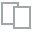
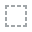
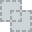
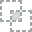
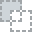
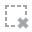
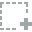
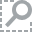
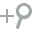
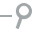
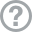
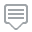
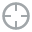
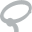
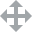
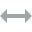
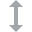
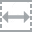
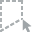
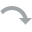
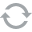
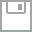
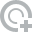
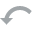
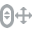
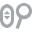
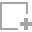
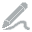
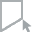
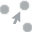
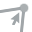
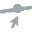

In [45]:
from dataprep.eda import plot
plot(df)

In [ ]:
df2 = df[['ID', 'DIPL', 'EMPL']]
df2 = df2.fillna(0)
df2.head()
df2 = df2.pivot_table('DIPL', 'EMPL', 'ID', aggfunc="sum")

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df2, annot=True, linewidths=.5, ax=ax)

In [138]:
df_age = df[['AGER', 'GENRE']]
df_homme = df_age.loc[df_age['GENRE'] == 1].groupby('AGER').sum()
df_homme['AGER'] = df_homme.index
print(df_homme.shape)
print(df_homme.loc[df_homme['AGER'] == 40])
df_homme['GENRE'] = 0-df_homme['GENRE']
df_homme = df_homme.rename(columns={'GENRE': 'homme'})


df_femme = df_age.loc[df_age['GENRE'] == 2].groupby('AGER').sum()
df_femme = df_femme.rename(columns={'GENRE': 'femme'})
df_femme['AGER'] = df_femme.index
print(df_femme.shape)
df_femme.loc[df_femme['AGER'] == 40]


(101, 2)
      GENRE  AGER
AGER             
40     1349    40
(105, 2)


femme  AGER
AGER             
40     3094    40

## Pyramide des ages

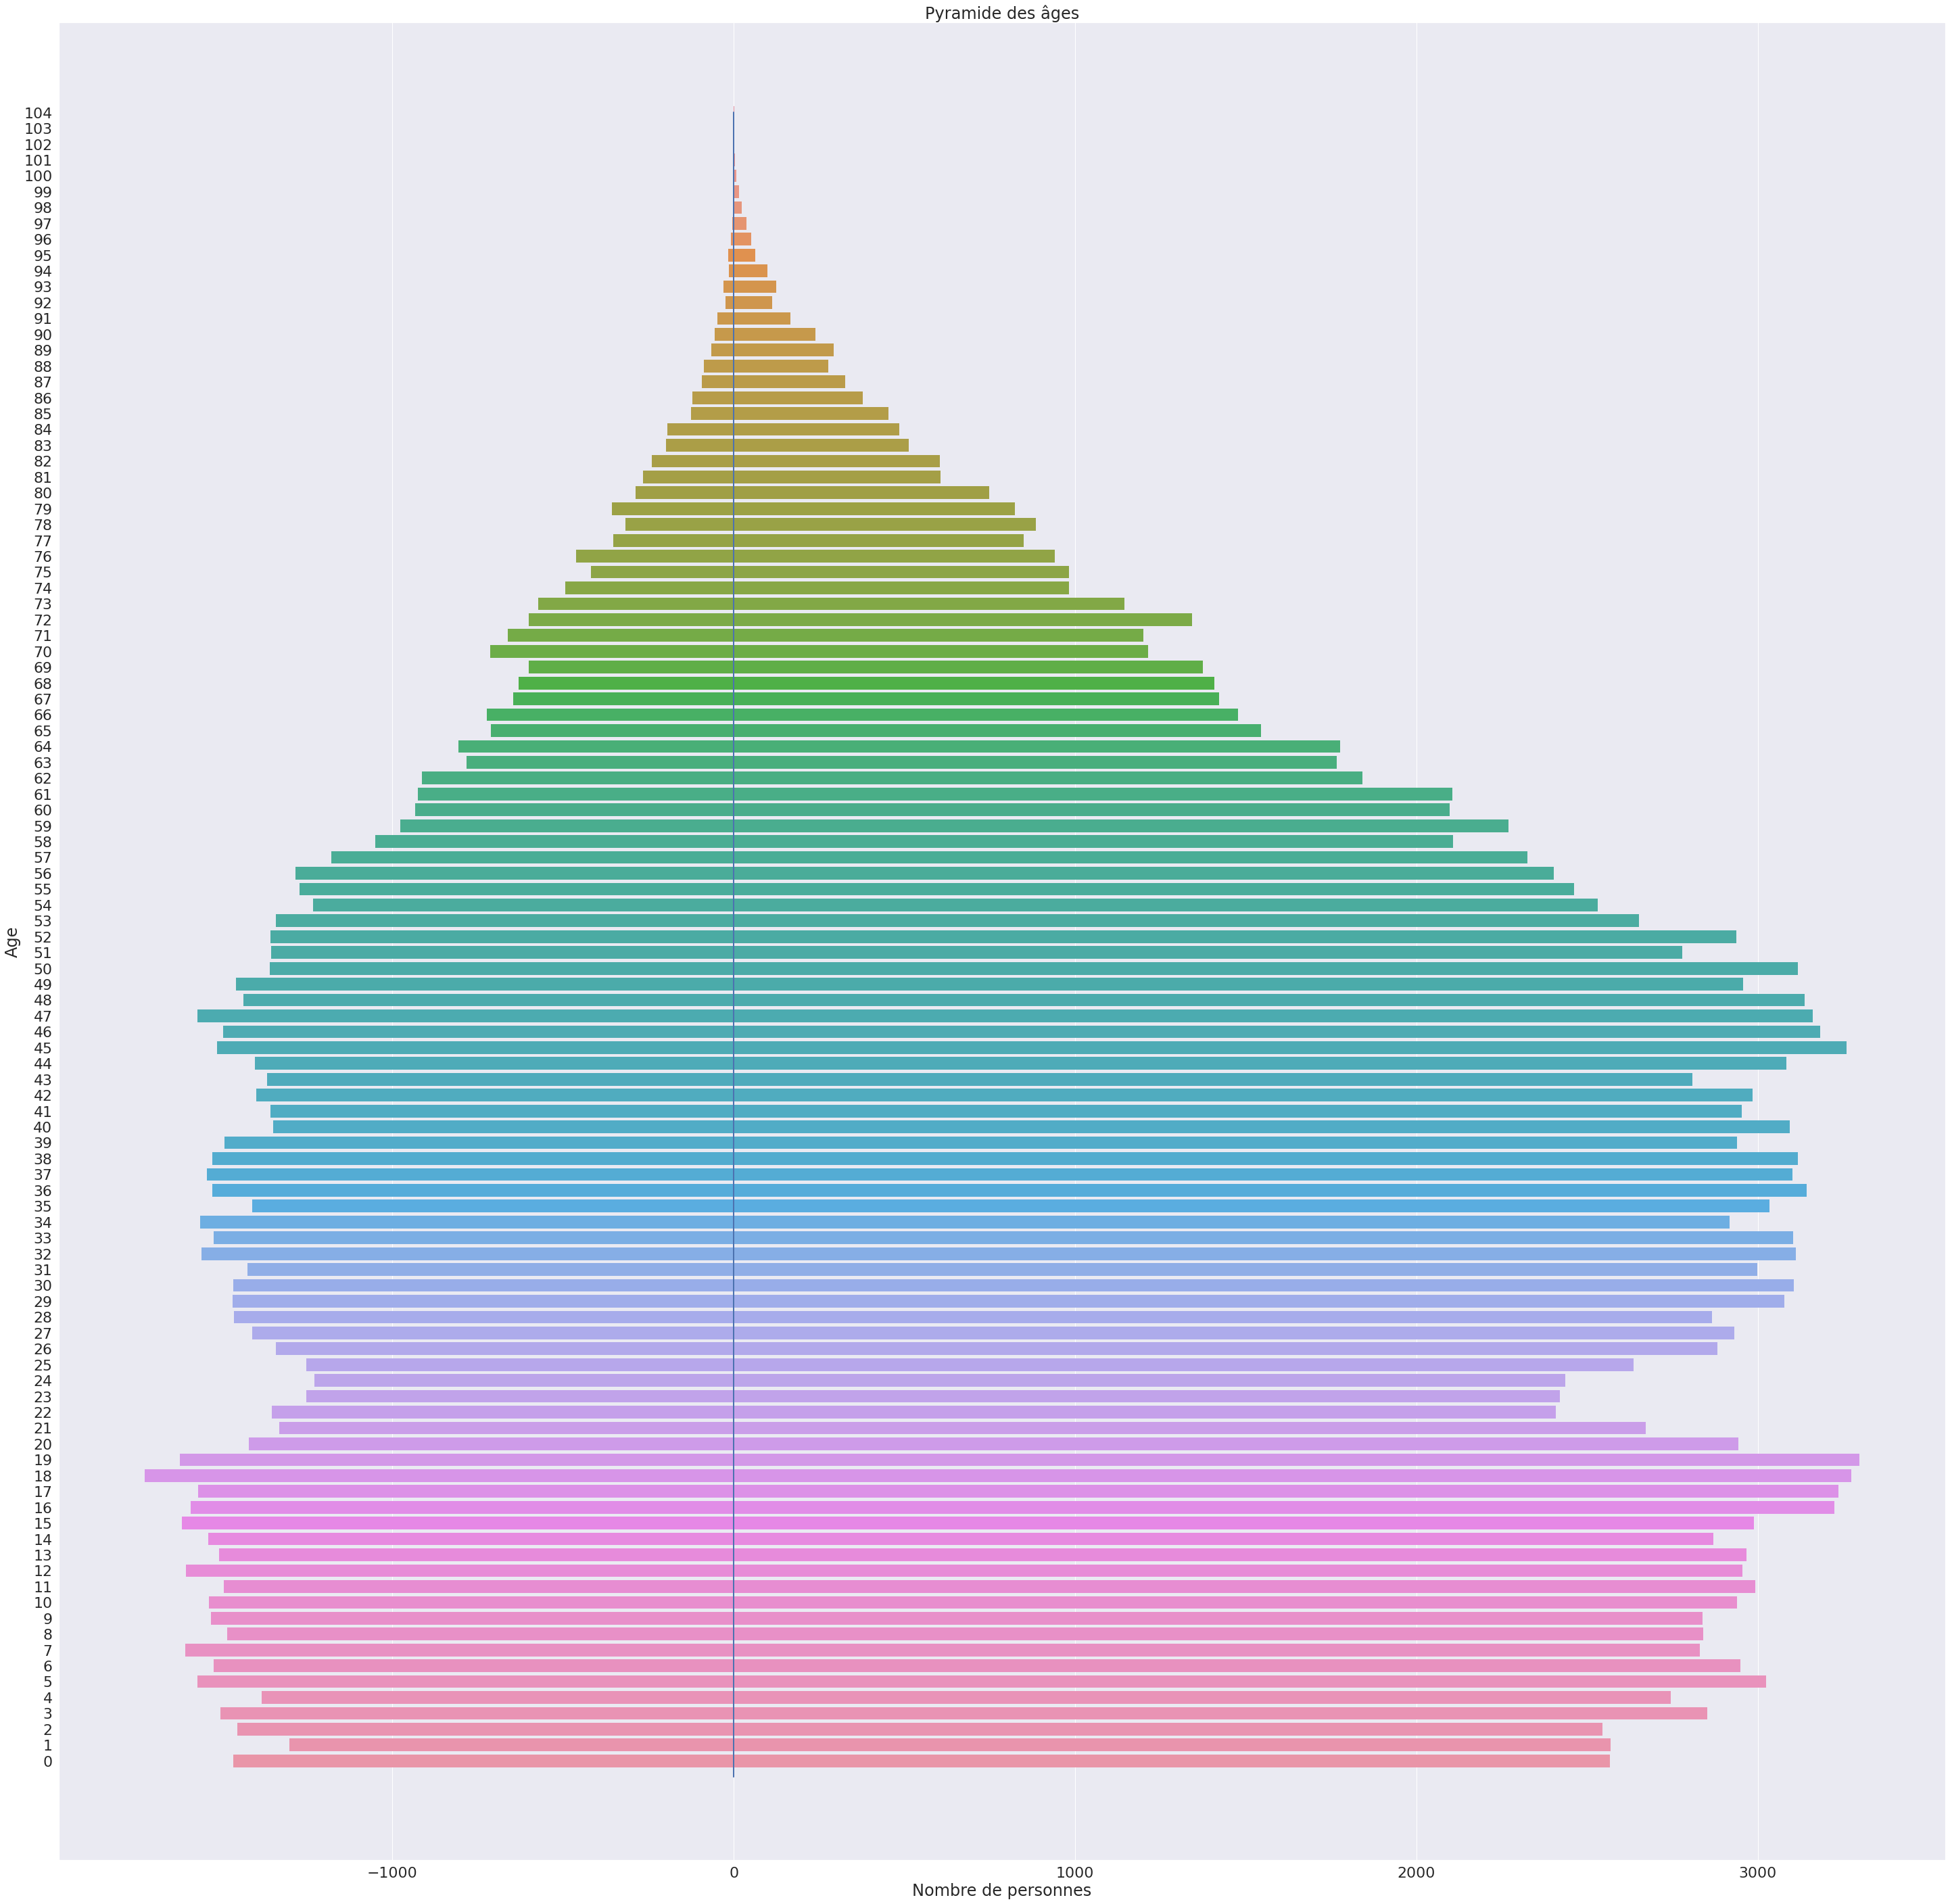

In [120]:
sns.set(font_scale = 2)
df4 = pd.concat([df_homme, df_femme], axis=1).iloc[::-1]
figure = plt.figure(figsize=(50, 50))

bar_plot = sns.barplot(x='homme', y=df4.index, data=df4, order=df4.index, lw=0, orient='horizontal')
bar_plot = sns.barplot(x='femme', y=df4.index, data=df4, order=df4.index, lw=0, orient='horizontal')
bar_plot.set(ylabel="Age", xlabel="Nombre de personnes", title = "Pyramide des âges")
plt.plot([0,0], [0,105], linewidth=2)
#sns;barplot(data=df_age, x=)

## Relation entre niveau de diplome, type d'emploi et catégorie socioprofessionnelle

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


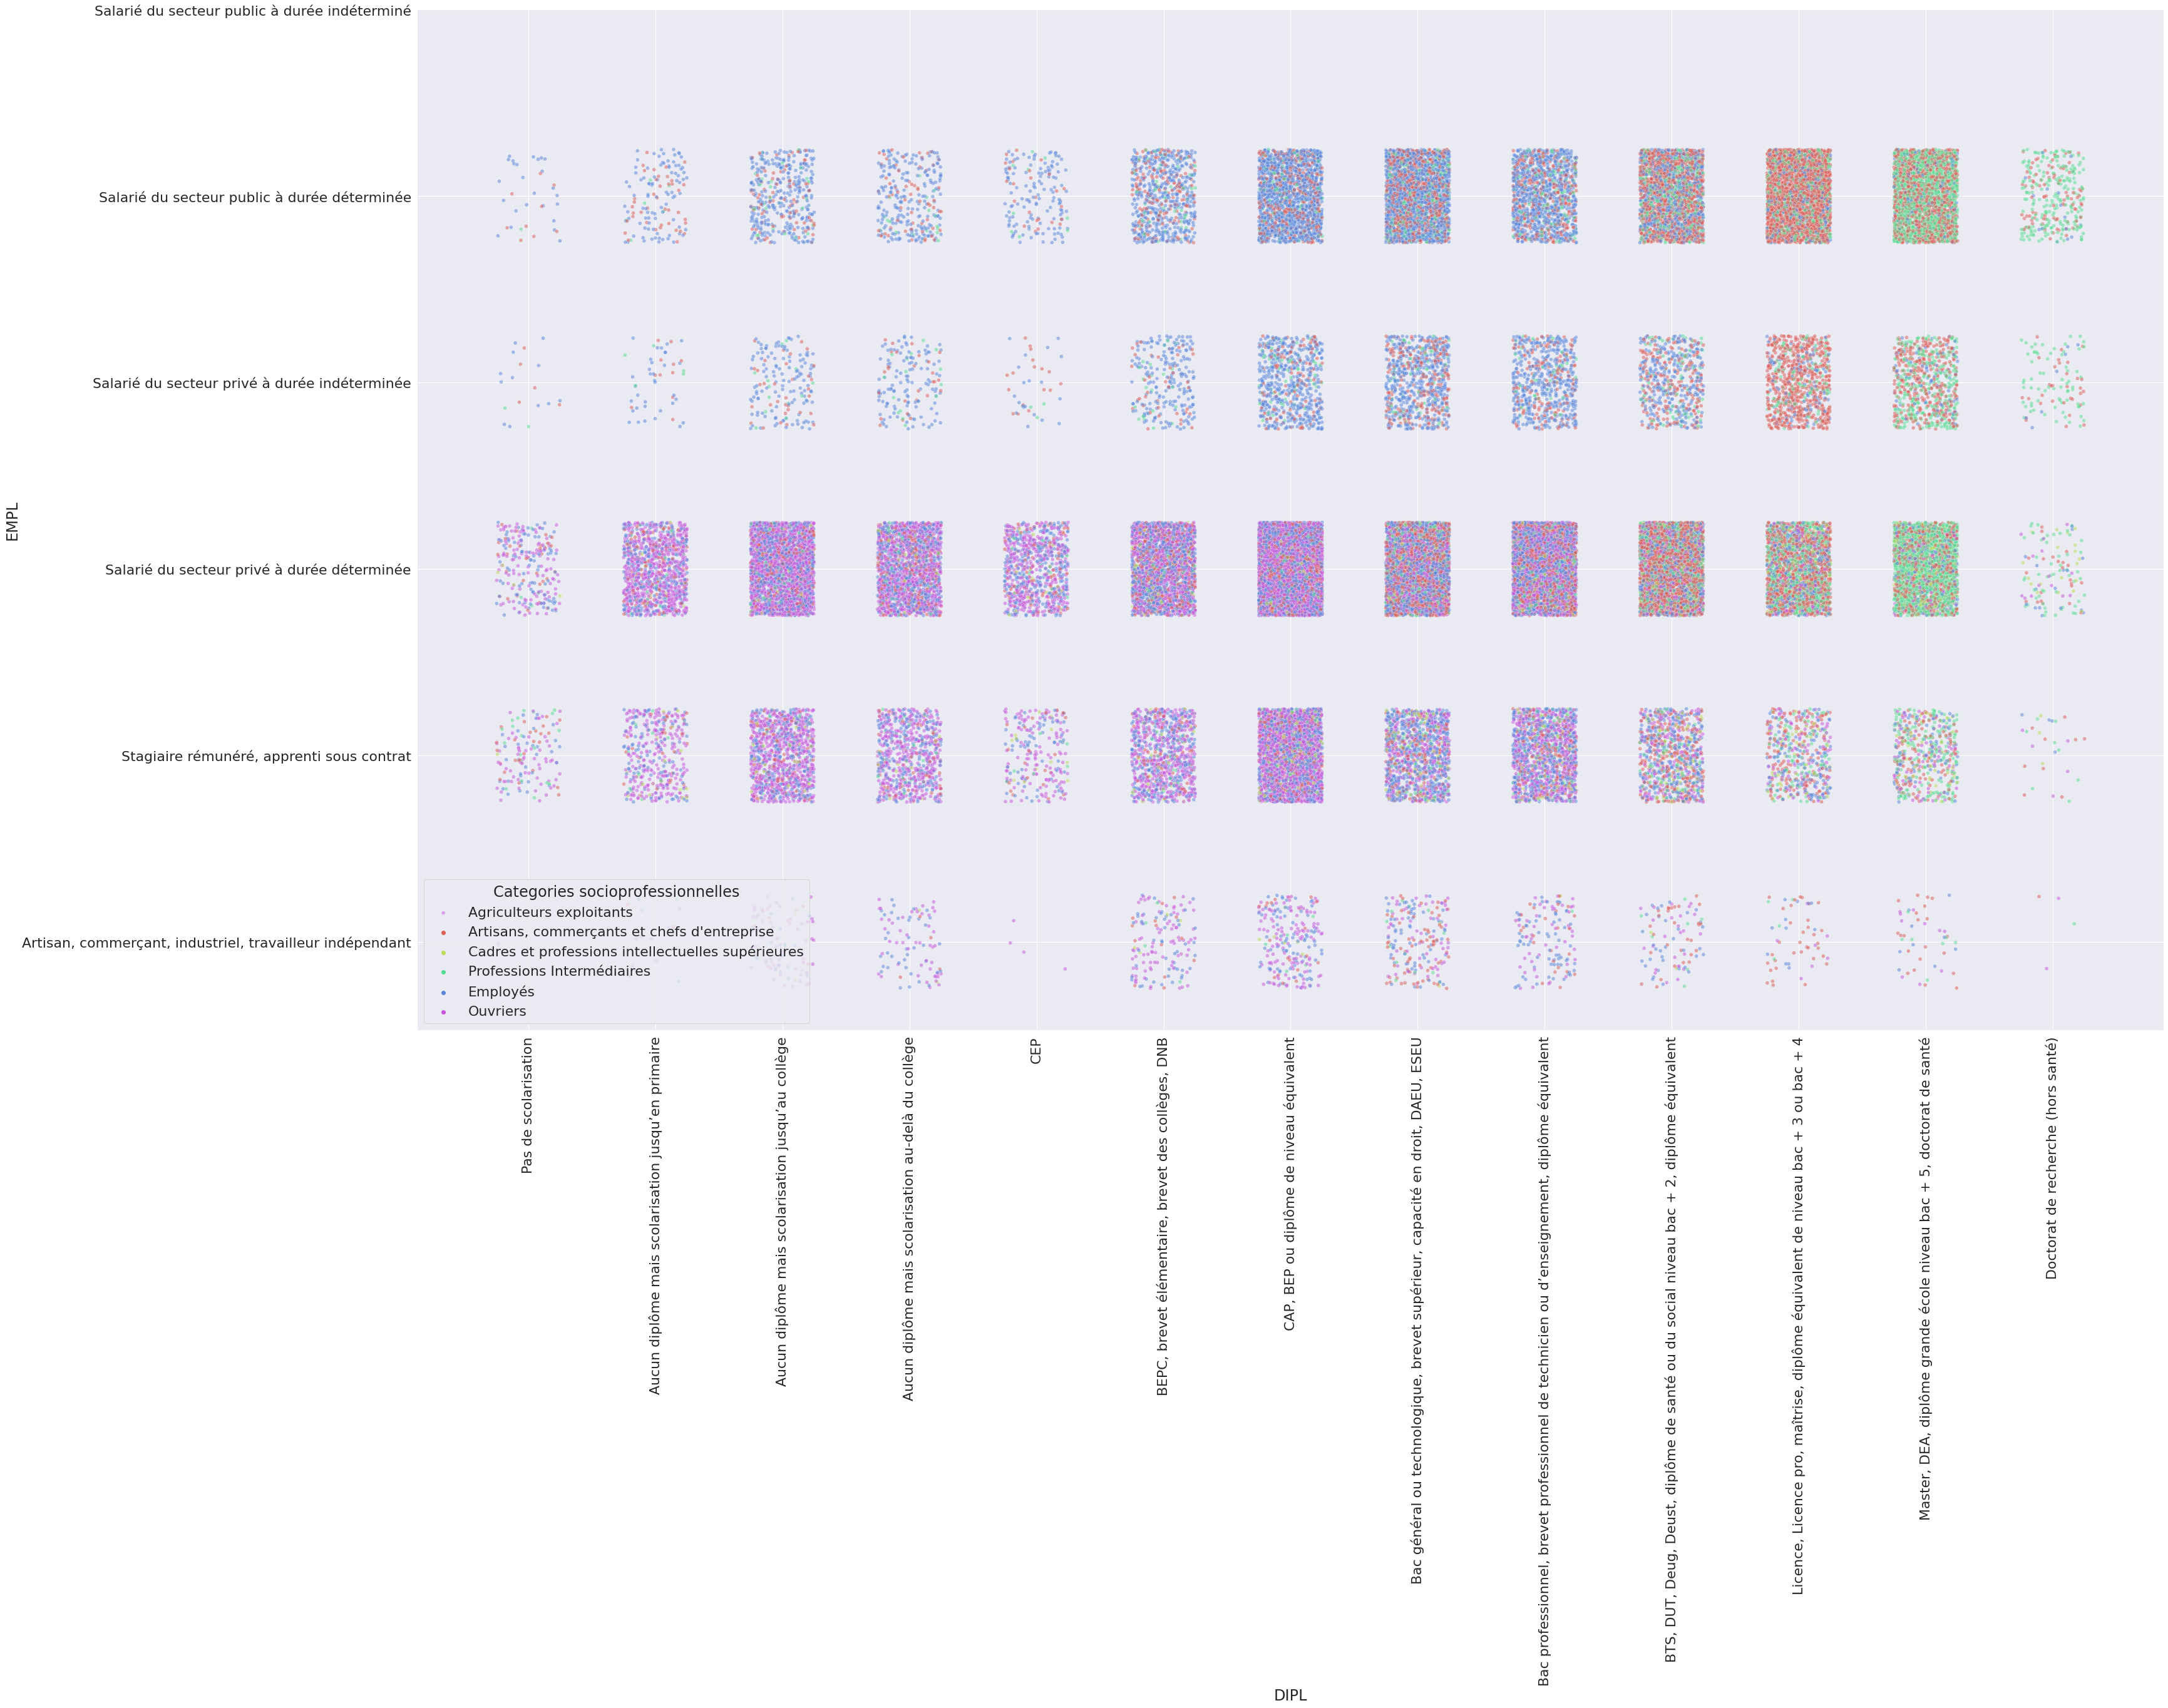

In [238]:
df_metier = df[['DIPL', 'EMPL', 'CS8']].dropna()
sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=(50, 30))
df_counts = df_metier.groupby(['DIPL', 'EMPL']).size().reset_index()
df_counts.columns.values[df_counts.columns == 0] = 'count'
scale = 500*df_counts['count'].size
size = df_counts['count']/df_counts['count'].sum()*scale
#size = size.astype(float)

#sns.stripplot(x='DIPL', y='EMPL', hue='CS8', data=df_metier, ax=ax) #, size=size, sizes=(10,500)
dipl_id = [1, 2, 3, 4, 11, 12, 13, 14, 15, 16, 17, 18, 19]
dipl_lbl = ['Pas de scolarisation', 'Aucun diplôme mais scolarisation jusqu’en primaire', 'Aucun diplôme mais scolarisation jusqu’au collège', 
            'Aucun diplôme mais scolarisation au-delà du collège', 'CEP' , 'BEPC, brevet élémentaire, brevet des collèges, DNB' , 'CAP, BEP ou diplôme de niveau équivalent',
            'Bac général ou technologique, brevet supérieur, capacité en droit, DAEU, ESEU',
            'Bac professionnel, brevet professionnel de technicien ou d’enseignement, diplôme équivalent',
            'BTS, DUT, Deug, Deust, diplôme de santé ou du social niveau bac + 2, diplôme équivalent',
            'Licence, Licence pro, maîtrise, diplôme équivalent de niveau bac + 3 ou bac + 4',
            'Master, DEA, diplôme grande école niveau bac + 5, doctorat de santé',
            'Doctorat de recherche (hors santé)']
#plt.xticks(dipl_id, dipl_lbl, rotation=45, )

empl_lbl = ['Artisan, commerçant, industriel, travailleur indépendant', 'Stagiaire rémunéré, apprenti sous contrat',
            'Salarié du secteur privé à durée déterminée', 'Salarié du secteur privé à durée indéterminée',
            'Salarié du secteur public à durée déterminée', 'Salarié du secteur public à durée indéterminé']


from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ord_enc = OrdinalEncoder()
enc_df = pd.DataFrame(ord_enc.fit_transform(df_metier), columns=list(df_metier.columns))

xnoise, ynoise = np.random.random(len(df_metier))/2, np.random.random(len(df_metier))/2 

sns.scatterplot(enc_df["DIPL"]+xnoise, enc_df["EMPL"]+ynoise, alpha=0.5, hue=enc_df['CS8'], palette="hls")

plt.yticks(np.arange(0.25, len(empl_lbl)+0.25, 1), empl_lbl)

xrange = np.arange(0.25, len(dipl_lbl)+0.25, 1)
plt.xticks(xrange, dipl_lbl, rotation=90)

plt.legend(title='Categories socioprofessionnelles', loc='lower left', labels=['Agriculteurs exploitants', 'Artisans, commerçants et chefs d\'entreprise',
                                                         'Cadres et professions intellectuelles supérieures', 'Professions Intermédiaires',
                                                         'Employés', 'Ouvriers'])


In [257]:
! pip install jupyter-dash

OSError: [Errno 12] Cannot allocate memory

In [256]:
p = figure(width=1000, height=500)
from bokeh.models import ColumnDataSource
from bokeh.transform import jitter
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral5
source = ColumnDataSource(data=enc_df)

index_cmap = factor_cmap('CS8', palette=Spectral5, factors=sorted(df['CS8'].unique()), end=1)
p.circle(x='DIPL', y=jitter('EMPL', width=0.6, range=p.y_range),  source=source, alpha=0.3, fill_color=index_cmap)
p.x_range.range_padding = 0

print(source)
show(p)

TypeError: '<' not supported between instances of 'float' and 'str'